In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Set a good visual theme
sns.set(style="whitegrid")


In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_table = pd.read_html(url)
sp500 = sp500_table[0]
sp500 = sp500[['Symbol', 'Security', 'GICS Sector']]
sp500.columns = ['Ticker', 'Company', 'Sector']
sp500.head()

,Ticker,Company,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology


In [3]:
np.random.seed(42)  # For reproducibility

sp500['E_Score'] = np.random.randint(50, 100, size=len(sp500))
sp500['S_Score'] = np.random.randint(50, 100, size=len(sp500))
sp500['G_Score'] = np.random.randint(50, 100, size=len(sp500))

# Calculate composite ESG score
sp500['ESG_Score'] = sp500[['E_Score', 'S_Score', 'G_Score']].mean(axis=1)
sp500.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1476\583651823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['E_Score'] = np.random.randint(50, 100, size=len(sp500))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1476\583651823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['S_Score'] = np.random.randint(50, 100, size=len(sp500))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1476\583651823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Ticker,Company,Sector,E_Score,S_Score,G_Score,ESG_Score
0,MMM,3M,Industrials,88,85,53,75.333333
1,AOS,A. O. Smith,Industrials,78,82,79,79.666667
2,ABT,Abbott Laboratories,Health Care,64,79,60,67.666667
3,ABBV,AbbVie,Health Care,92,86,79,85.666667
4,ACN,Accenture,Information Technology,57,72,80,69.666667


In [9]:
def get_stock_return(ticker):
    ticker = ticker.replace('.', '-')
    try:
        data = yf.download(ticker, period="1y", progress=False)
        time.sleep(1)
        if data.empty:
            print(f"No data for {ticker}")
            return np.nan
        start_price = data['Close'].iloc[0]
        end_price = data['Close'].iloc[-1]
        return float((end_price - start_price) / start_price * 100)
    except Exception as e:
        print(f"Error fetching {ticker}: {e}")
        return np.nan


In [10]:
subset = sp500.head(50).copy()
subset['1Y_Return'] = subset['Ticker'].apply(get_stock_return)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1476\3819557449.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y", progress=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1476\3819557449.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float((end_price - start_price) / start_price * 100)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1476\3819557449.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y", progress=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1476\3819557449.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float((end_price - start_price) / start_price * 100)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_147

In [11]:
subset = subset.dropna(subset=['1Y_Return'])

           ESG_Score  1Y_Return
ESG_Score   1.000000   0.187826
1Y_Return   0.187826   1.000000


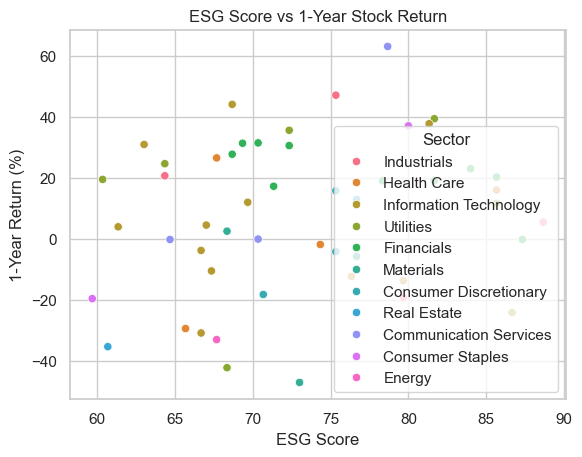

In [12]:
# Correlation between ESG and 1Y Return
correlation = subset[['ESG_Score', '1Y_Return']].corr()
print(correlation)

sns.scatterplot(data=subset, x='ESG_Score', y='1Y_Return', hue='Sector')
plt.title("ESG Score vs 1-Year Stock Return")
plt.xlabel("ESG Score")
plt.ylabel("1-Year Return (%)")
plt.show()


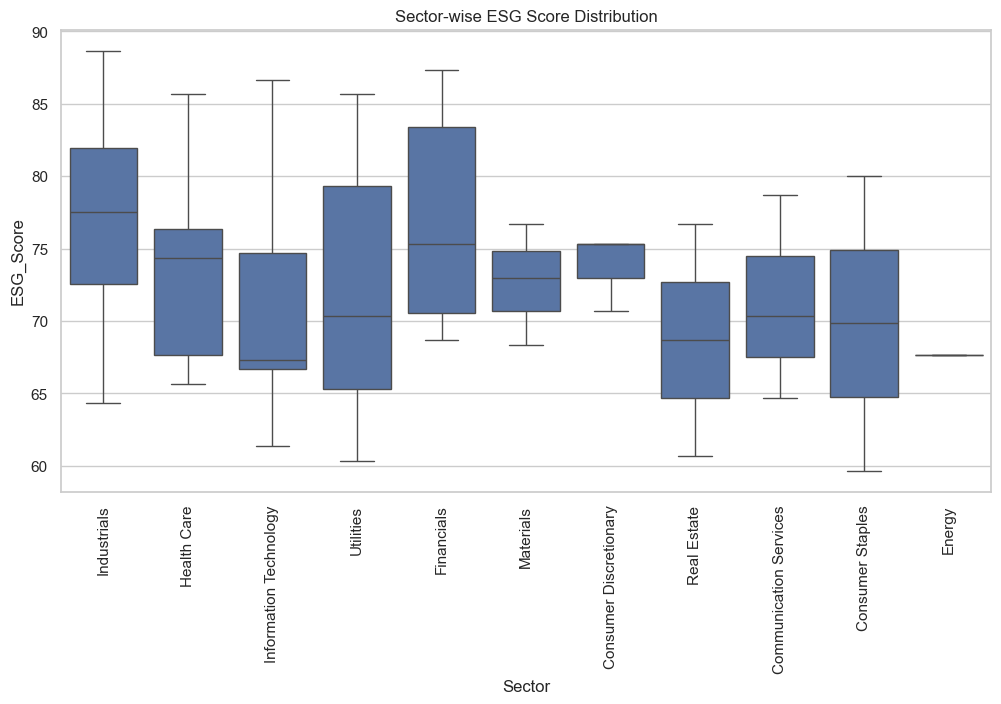

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='Sector', y='ESG_Score')
plt.xticks(rotation=90)
plt.title("Sector-wise ESG Score Distribution")
plt.show()


In [14]:
subset.to_csv("esg_sp500_analysis.csv", index=False)
